## Problem Statement

At some point or the other almost each one of us has used an Ola or Uber for taking a ride. 

Ride hailing services are services that use online-enabled platforms to connect between passengers and local drivers using their personal vehicles. In most cases they are a comfortable method for door-to-door transport. Usually they are cheaper than using licensed taxicabs. Examples of ride hailing services include Uber and Lyft.

<img src="2560px-Ride_hailing_services_Wikivoyage_banner.jpg">

To improve the efficiency of taxi dispatching systems for such services, it is important to be able to predict how long a driver will have his taxi occupied. If a dispatcher knew approximately when a taxi driver would be ending their current ride, they would be better able to identify which driver to assign to each pickup request.

In this competition, we are challenged to build a model that predicts the total ride duration of taxi trips in New York City.

## 1. Exploratory Data Analysis
Let's check the data files! According to the data description we should find the following columns:

 - **id** - a unique identifier for each trip
 - **vendor_id** - a code indicating the provider associated with the trip record
 - **pickup_datetime** - date and time when the meter was engaged
 - **dropoff_datetime** - date and time when the meter was disengaged
 - **passenger_count** - the number of passengers in the vehicle (driver entered value)
 - **pickup_longitude** - the longitude where the meter was engaged
 - **pickup_latitude** - the latitude where the meter was engaged
 - **dropoff_longitude** - the longitude where the meter was disengaged
 - **dropoff_latitude** - the latitude where the meter was disengaged
 - **store_and_fwd_flag** - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server (Y=store and forward; N=not a store and forward trip)
 - **trip_duration** - (target) duration of the trip in seconds

Here, we have 2 variables dropoff_datetime and store_and_fwd_flag which are not available before the trip starts and hence will not be used as features to the model.

### 1.1 Load Libraries

In [2]:
#Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#https://www.analyticsvidhya.com/blog/2021/01/exploratory-data-analysis-on-nyc-taxi-trip-duration-dataset/

In [4]:
#importing the required libraries 
import pandas as pd  #data processing
import numpy as np   #linear algebra
import matplotlib.pyplot as plt

#data visualisation
import seaborn as sns     
sns.set()
%matplotlib inline
import matplotlib.pyplot as plt


from datetime import timedelta
import datetime as dt
from sklearn.model_selection import train_test_split
from math import radians, cos, sin, asin, sqrt

from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


### Load Data

In [5]:
df=pd.read_csv("nyc_taxi_trip_duration.csv")

In [6]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [7]:
#Exploring the Dataset
df.shape

(729322, 11)

In [8]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [9]:
# let us now look at the datatypes of all the columns
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [10]:
df.nunique()

id                    729322
vendor_id                  2
pickup_datetime       709359
dropoff_datetime      709308
passenger_count            9
pickup_longitude       19729
pickup_latitude        39776
dropoff_longitude      27892
dropoff_latitude       53579
store_and_fwd_flag         2
trip_duration           6296
dtype: int64

we can Confirm all Entries are unique and no Duplicates are present in Data By looking at Unique ID

Theres Only 2 Vendors

In [11]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


In [12]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  729322 non-null  object 
 1   vendor_id           729322 non-null  int64  
 2   pickup_datetime     729322 non-null  object 
 3   dropoff_datetime    729322 non-null  object 
 4   passenger_count     729322 non-null  int64  
 5   pickup_longitude    729322 non-null  float64
 6   pickup_latitude     729322 non-null  float64
 7   dropoff_longitude   729322 non-null  float64
 8   dropoff_latitude    729322 non-null  float64
 9   store_and_fwd_flag  729322 non-null  object 
 10  trip_duration       729322 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 61.2+ MB


### observations:

vendor_id are the provider identification thus it is considered categorical

passenger_count can be take as categorical for better analysis

trip_duration are numbers hence they are also fall in integer category

pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude are suited to in float datatype

id is a unique variable with numerical parts and id written at front and I choose to treat it as an object itself

pickup_datetime and dropoff_datetime are datetime variable

store_and_fwd_flag can be grouped under categorical

Data has 729322 Entries And 11 column

Datetime Column is in Object Class Has to be Converted to Date Time Form

### File structure and content

In [13]:
print('We have {} rows.'.format(df.shape[0]))
print('We have {} columns'.format(df.shape[1]))
df.iloc[1,:]

We have 729322 rows.
We have 11 columns


id                              id0889885
vendor_id                               1
pickup_datetime       2016-03-11 23:35:37
dropoff_datetime      2016-03-11 23:53:57
passenger_count                         2
pickup_longitude               -73.988312
pickup_latitude                 40.731743
dropoff_longitude              -73.994751
dropoff_latitude                40.694931
store_and_fwd_flag                      N
trip_duration                        1100
Name: 1, dtype: object

At first glance, we can see the types of each variable and what they look like. 

### Missing Values
Knowing about missing values is important because they indicate how much we don’t know about our data. Making inferences based on just a few cases is often unwise. In addition, many modelling procedures break down when missing values are involved and the corresponding rows will either have to be removed completely or the values need to be estimated somehow.

In [14]:
np.sum(pd.isnull(df))

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

Fortunately, in this dataset we do not have any missing values which is great.

### Reformatting features & Checking consistency
There are a variety of features within the dataset and it is important to convert them into the right format such that we can analyse them easily. This would include converting datetime features and string features. 

Also, one important thing is never to take assumptions without backing it with data. Here, as you can see the trip duration can also be calculated pick up and drop off datetime. We will check whether the given duration is consistent with the calculated trip duration 

In [15]:
# converting strings to datetime features
df['pickup_datetime'] = pd.to_datetime(df.pickup_datetime)
df['dropoff_datetime'] = pd.to_datetime(df.dropoff_datetime)

# Converting yes/no flag to 1 and 0
df['store_and_fwd_flag'] = 1 * (df.store_and_fwd_flag.values == 'Y')

df['check_trip_duration'] = (df['dropoff_datetime'] - df['pickup_datetime']).map(lambda x: x.total_seconds())

duration_difference = df[np.abs(df['check_trip_duration'].values  - df['trip_duration'].values) > 1]
duration_difference.shape

(0, 12)

This implies that there is no inconsistency in data wrt the drop location and trip duration

### Target Exploration
In this section we will take a look at the trip duration which is the target variable. It is crucial to understand it in detail as this is what we are trying to predict accurately.

In [16]:
df['trip_duration'].describe()/3600 # Trip duration in hours

count    202.589444
mean       0.264508
std        1.073507
min        0.000278
25%        0.110278
50%        0.184167
75%        0.298611
max      538.815556
Name: trip_duration, dtype: float64

Woah! There is a trip with duration of 979 hours. This is a huge outlier and might create problems at the prediction stage. One idea is to log transform the trip duration before prediction to visualise it better.

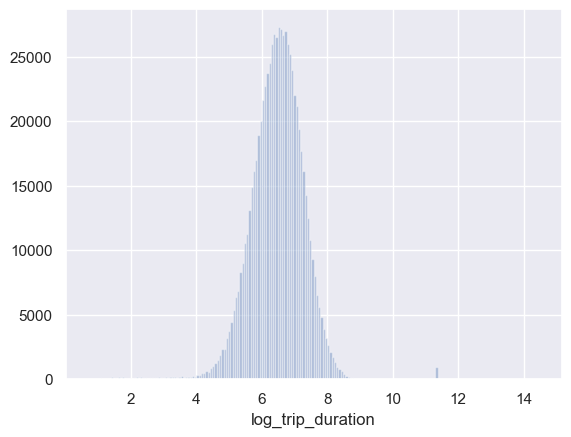

In [17]:
df['log_trip_duration'] = np.log(df['trip_duration'].values + 1)
sns.distplot(df['log_trip_duration'], kde = False, bins = 200)
plt.show()

We find:

1. The majority of rides follow a rather smooth distribution that looks almost log-normal with a peak just around exp(6.5)  i.e. about 17 minutes.
2. There are several suspiciously short rides with less than 10 seconds duration.
3. As discussed earlier, there are a few huge outliers near 12.

# Basic Predictive Modeling

## 1. Used Evalution Metric is RMSE

As we know that this is a regression problem then we have to predict continous value, which is our target- trip_duration.

**So the evalutation metric for this model is - Root Mean Squared Error(RMSE)**

RMSE is a very simple metric to be used for evaluation. Since, we will be comparing our models and we will create a benchmark model as a baseline, RMSE will easy to compare these different models. Lower, the value of RMSE, better the model. It will help in getting the elbow curve.

RMSE is most commonly used evaluation metrics for regression problems since it brings down the unit of the differnce between predicted and actual values to the same unit as the target variable 

## 2. Build a BenchMark model for the given dataset

In [18]:
df['trip_duration_hour'] = df['trip_duration'].apply(lambda x: x/3600)
df.drop(columns=['trip_duration'], inplace=True)

In [19]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], format = '%Y-%m-%d %H:%M:%S')
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'], format = '%Y-%m-%d %H:%M:%S')

In [20]:
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_weekday'] = df['pickup_datetime'].dt.weekday
df['pickup_day'] = df['pickup_datetime'].dt.day
df['pickup_month'] = df['pickup_datetime'].dt.month
df['pickup_year'] = df['pickup_datetime'].dt.year
df['pickup_date'] = df['pickup_datetime'].dt.date

df['dropoff_hour'] = df['dropoff_datetime'].dt.hour
df['dropoff_weekday'] = df['dropoff_datetime'].dt.weekday
df['dropoff_day'] = df['dropoff_datetime'].dt.day
df['dropoff_month'] = df['dropoff_datetime'].dt.month
df['dropoff_year'] = df['dropoff_datetime'].dt.year
df['dropoff_date'] = df['dropoff_datetime'].dt.date

In [21]:
def time_of_day(x):
    # to calculate what time of it is now
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

df['pickup_time_of_day'] = df['pickup_hour'].apply(time_of_day)
df['dropoff_time_of_day'] = df['dropoff_hour'].apply(time_of_day)

In [22]:
df.drop(columns=['pickup_hour','pickup_weekday','pickup_day','pickup_month','pickup_year','dropoff_hour','dropoff_weekday','dropoff_day','dropoff_month','dropoff_year'], inplace=True)

In [23]:
#simple predictive model
df["trip_duration_hour_mean"]=df["trip_duration_hour"].mean()
df["trip_duration_hour_mean"].head()

0    0.264508
1    0.264508
2    0.264508
3    0.264508
4    0.264508
Name: trip_duration_hour_mean, dtype: float64

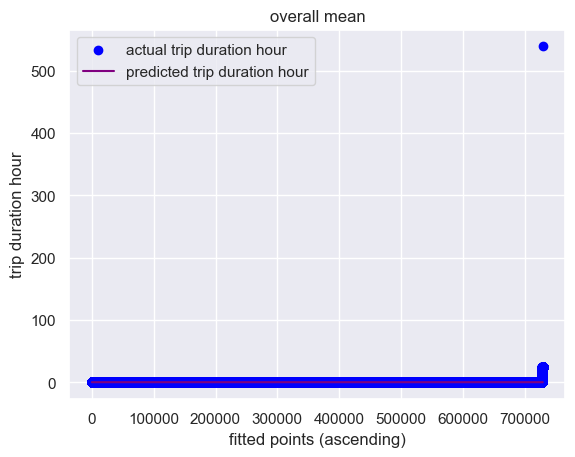

In [24]:
plt.figure(dpi=100)
k = range(0,len(df))
plt.scatter(k,df["trip_duration_hour"].sort_values(),color="blue",label="actual trip duration hour")
plt.plot(k,df["trip_duration_hour_mean"].sort_values(),color ="purple",label="predicted trip duration hour")
plt.xlabel("fitted points (ascending)")
plt.ylabel("trip duration hour")
plt.title("overall mean")
plt.legend()

From the above simple predictive model we can draw an insight that the values of actual trip duration and predicted trip duration are almost same.

In [25]:
#importing the shuffle library 
from sklearn.utils import shuffle

# Shuffling the Dataset
df = shuffle(df, random_state = 42)

#creating 4 divisions
div = int(df.shape[0]/4)

# 3 parts to train set and 1 part to test set
train = df.loc[:3*div+1,:]
test = df.loc[3*div+1:]

In [26]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,check_trip_duration,log_trip_duration,trip_duration_hour,pickup_date,dropoff_date,pickup_time_of_day,dropoff_time_of_day,trip_duration_hour_mean
469114,id2380741,2,2016-05-21 10:40:14,2016-05-21 10:51:11,1,-73.981796,40.762035,-73.972267,40.781265,0,657.0,6.489205,0.182500,2016-05-21,2016-05-21,Morning,Morning,0.264508
694852,id3946961,2,2016-01-08 18:49:27,2016-01-08 18:52:42,5,-73.980965,40.747677,-73.982704,40.741161,0,195.0,5.278115,0.054167,2016-01-08,2016-01-08,Evening,Evening,0.264508
696324,id0833913,1,2016-05-22 00:54:10,2016-05-22 01:08:10,1,-73.951065,40.782722,-73.867691,40.833664,0,840.0,6.734592,0.233333,2016-05-22,2016-05-22,Late night,Late night,0.264508
356496,id1336849,1,2016-06-11 10:32:12,2016-06-11 10:38:50,1,-73.987625,40.762791,-73.973518,40.762909,0,398.0,5.988961,0.110556,2016-06-11,2016-06-11,Morning,Morning,0.264508
645318,id1610858,1,2016-04-03 10:45:51,2016-04-03 10:57:13,3,-73.964333,40.792503,-73.988609,40.758369,0,682.0,6.526495,0.189444,2016-04-03,2016-04-03,Morning,Morning,0.264508


In [27]:
test.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,check_trip_duration,log_trip_duration,trip_duration_hour,pickup_date,dropoff_date,pickup_time_of_day,dropoff_time_of_day,trip_duration_hour_mean
546991,id2240736,1,2016-05-25 07:59:16,2016-05-25 08:05:02,1,-73.991364,40.732590,-74.000526,40.742283,0,346.0,5.849325,0.096111,2016-05-25,2016-05-25,Morning,Morning,0.264508
43126,id1423404,1,2016-01-18 12:17:13,2016-01-18 12:21:13,2,-73.966225,40.768059,-73.967606,40.763073,0,240.0,5.484797,0.066667,2016-01-18,2016-01-18,Afternoon,Afternoon,0.264508
641450,id1317268,2,2016-03-02 18:39:01,2016-03-02 18:50:12,1,-73.994926,40.766018,-74.004219,40.742523,0,671.0,6.510258,0.186389,2016-03-02,2016-03-02,Evening,Evening,0.264508
611380,id3335546,1,2016-04-06 19:17:20,2016-04-06 19:18:03,1,-73.974388,40.793781,-73.976006,40.792339,0,43.0,3.784190,0.011944,2016-04-06,2016-04-06,Evening,Evening,0.264508
62690,id2174190,2,2016-06-21 18:35:31,2016-06-21 18:40:56,3,-73.963440,40.798557,-73.979736,40.777878,0,325.0,5.786897,0.090278,2016-06-21,2016-06-21,Evening,Evening,0.264508


In [28]:
# storing simple mean in a new column in the test set as "simple_mean"
df["trip_duration_hour_mean"]=df["trip_duration_hour"].mean()
df["trip_duration_hour_mean"]

469114    0.264508
694852    0.264508
696324    0.264508
356496    0.264508
645318    0.264508
            ...   
259178    0.264508
365838    0.264508
131932    0.264508
671155    0.264508
121958    0.264508
Name: trip_duration_hour_mean, Length: 729322, dtype: float64

In [29]:
#calculating RMSE
from sklearn.metrics import mean_squared_error as mse
from math import sqrt

trip_mean_error = sqrt((mse(test['trip_duration_hour'] , test['trip_duration_hour_mean'])))
trip_mean_error

0.8904067655425832

The RMSE of the trip duration hour mean with respect to the mean of pickup time of the day is higher than the simple mean of the trip duration hour

The best metric is selected as root mean absolute error as mostof the outliers in the data are removed. since the variable of distance and speed are related to time duration a mean squared or root mean squared errror calculation is felt not required

In [30]:
#trip duration mean with respect to the mean of pickup time of the day
pickup = pd.pivot_table(train, values='trip_duration_hour', index = ['pickup_time_of_day'], aggfunc=np.mean)
pickup

,trip_duration_hour
pickup_time_of_day,
Afternoon,0.291531
Evening,0.264078
Late night,0.255589
Morning,0.250610


In [31]:
# initializing new column to zero
test['pickup'] = 0

# For every unique entry in pickup longitude
for i in train['pickup_time_of_day'].unique():
  # Assign the mean value corresponding to unique entry
  test['pickup'][test['pickup_time_of_day'] == str(i)] = train['trip_duration_hour'][train['pickup_time_of_day'] == str(i)].mean()

In [32]:
#calculating RMSE
pickup_error = sqrt(mse(test['trip_duration_hour'] , test['pickup'] ))
pickup_error

0.8903816016040094

In [33]:
#trip duration mean with respect to the mean of dropoff time of the day
dropoff =pd.pivot_table(train, values='trip_duration_hour', index = ['dropoff_time_of_day'], aggfunc=np.mean)
dropoff

,trip_duration_hour
dropoff_time_of_day,
Afternoon,0.284258
Evening,0.269666
Late night,0.256343
Morning,0.247905


In [34]:
# initializing new column to zero
test['dropoff'] = 0

# For every unique entry in pickup latitude
for i in train['dropoff_time_of_day'].unique():
  # Assign the mean value corresponding to unique entry
  test['dropoff'][test['dropoff_time_of_day'] == str(i)] = train['trip_duration_hour'][train['dropoff_time_of_day'] == str(i)].mean()

In [35]:
#calculating mean absolute error
dropoff_error = sqrt(mse(test['trip_duration_hour'] , test['dropoff'] ))
dropoff_error

0.8903865469170373

In [36]:
##trip duration mean with respect to the mean of passenger count
pass_count = pd.pivot_table(train, values='trip_duration_hour', index = ["passenger_count"], aggfunc=np.mean)
pass_count

,trip_duration_hour
passenger_count,
0,0.092981
1,0.255343
2,0.277822
3,0.287332
4,0.285759
5,0.299641
6,0.300193


In [37]:
# initializing new column to zero
test['pass_count'] = 0

# For every unique entry in passenger count
for i in train['passenger_count'].unique():
  # Assign the mean value corresponding to unique entry
  test['pass_count'][test['passenger_count'] == str(i)] = train['trip_duration_hour'][train['passenger_count'] == str(i)].mean()

In [38]:
pass_count_error = sqrt(mse(test['trip_duration_hour'] , test['pass_count'] ))
pass_count_error

0.9290781075032716

In [39]:
store_and_fwd = pd.pivot_table(train, values='trip_duration_hour', index = ["store_and_fwd_flag"], aggfunc=np.mean)
store_and_fwd  

,trip_duration_hour
store_and_fwd_flag,
0,0.264109
1,0.304058


In [40]:
# initializing new column to zero
test['store_and_fwd'] = 0

# For every unique entry in pickup latitude
for i in train['store_and_fwd_flag'].unique():
  # Assign the mean value corresponding to unique entry
  test['store_and_fwd'][test['store_and_fwd_flag'] == str(i)] = train['trip_duration_hour'][train['store_and_fwd_flag'] == str(i)].mean()

In [41]:
str_and_fwd_error = sqrt(mse(test['store_and_fwd'] , test['trip_duration_hour'] ))
str_and_fwd_error

0.9290781075032716

In [42]:
combo = pd.pivot_table(train, values = 'trip_duration_hour', index = ['passenger_count','pickup_time_of_day','dropoff_time_of_day'], aggfunc = np.mean)
combo

trip_duration_hour
passenger_count pickup_time_of_day dropoff_time_of_day                    
0               Afternoon          Afternoon                      0.305417
                Evening            Evening                        0.054352
                                   Late night                     0.106944
                Late night         Late night                     0.023856
                Morning            Afternoon                      0.432222
...                                                                    ...
6               Late night         Late night                     0.282054
                                   Morning                        0.313738
                Morning            Afternoon                      0.376369
                                   Late night                    16.731944
                                   Morning                        0.267228

[75 rows x 1 columns]

# Conclusions

* THe error of simple mean of trip duration hour is 0.89040676 which is also equal to rmse of dropp time and pickup time of the day   where as the str_fwd_error is 0.89040207 there is only slightly deferrence and 
* The rmse of passanger count is little high 0.92907810
* The pickup time error , dropoff time error and pass_count error  0.89040676  
